In [3]:
#Loan packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [21]:
#DATA COLLECTION AND LOADING
df=pd.read_csv("/content/train_loanPrediction.csv")



In [25]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [26]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1475,LP002689,Male,Yes,2.0,Not Graduate,No,2192,1742.0,45.0,360.0,1.0,Semiurban,Y
1476,LP002690,Male,No,0.0,Graduate,No,2500,0.0,55.0,360.0,1.0,Semiurban,Y
1477,LP002692,Male,Yes,3.0,Graduate,Yes,5677,1424.0,100.0,360.0,1.0,Rural,Y
1478,LP002693,Male,Yes,2.0,Graduate,Yes,7948,7166.0,480.0,360.0,1.0,Rural,Y
1479,LP002697,Male,No,0.0,Graduate,No,4680,2087.0,NaN,360.0,1.0,Semiurban,N


In [30]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [32]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,1443.000000,1480.000000,1480.000000,1430.000000,1456.000000,1354.000000
mean,0.786556,5420.054054,1668.158622,148.002797,341.587912,0.842688
std,1.013863,6127.461081,3111.846669,86.080796,66.759293,0.364229
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2873.000000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3750.000000,1287.000000,128.000000,360.000000,1.000000
75%,2.000000,5818.000000,2306.000000,166.750000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            1480 non-null   object 
 1   Gender             1445 non-null   object 
 2   Married            1475 non-null   object 
 3   Dependents         1443 non-null   float64
 4   Education          1480 non-null   object 
 5   Self_Employed      1408 non-null   object 
 6   ApplicantIncome    1480 non-null   int64  
 7   CoapplicantIncome  1480 non-null   float64
 8   LoanAmount         1430 non-null   float64
 9   Loan_Amount_Term   1456 non-null   float64
 10  Credit_History     1354 non-null   float64
 11  Property_Area      1480 non-null   object 
 12  Loan_Status        1480 non-null   object 
dtypes: float64(5), int64(1), object(7)
memory usage: 150.4+ KB


In [35]:
#data preprocessing
df.isnull().sum()

Loan_ID                0
Gender                35
Married                5
Dependents            37
Education              0
Self_Employed         72
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            50
Loan_Amount_Term      24
Credit_History       126
Property_Area          0
Loan_Status            0
dtype: int64

In [38]:
df1=df.dropna()

In [39]:
df1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [43]:
type(df1)

pandas.core.frame.DataFrame

In [45]:
val=df1.index
print(val)

Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
       ...
       1468, 1469, 1470, 1471, 1473, 1474, 1475, 1476, 1477, 1478],
      dtype='int64', length=1160)


Text(0, 0.5, 'No of App')

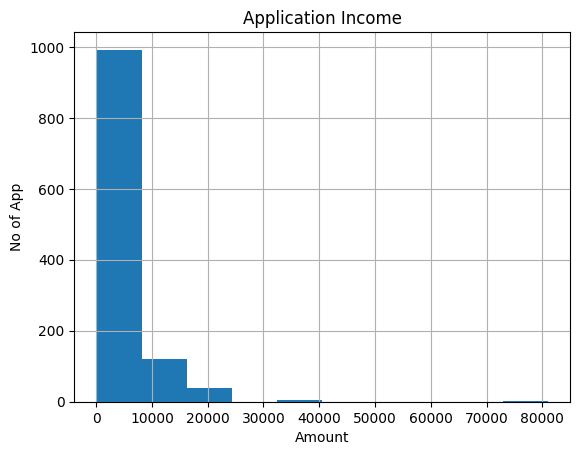

In [47]:
#Data Visualization
df1['ApplicantIncome'].hist(bins=10)
plt.title("Application Income")
plt.xlabel('Amount')
plt.ylabel('No of App')

Text(0, 0.5, 'No of CoApp')

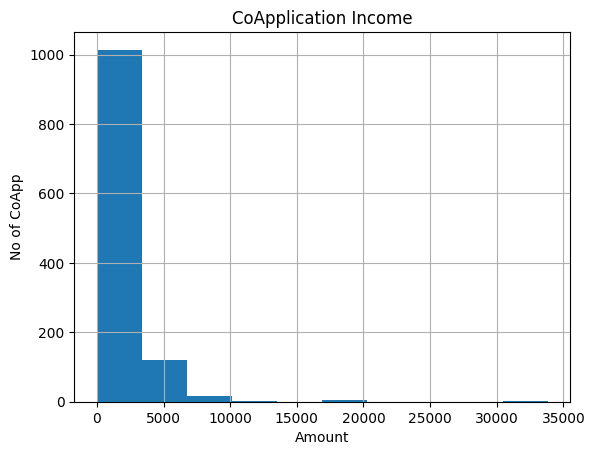

In [48]:
df1['CoapplicantIncome'].hist(bins=10)
plt.title("CoApplication Income")
plt.xlabel('Amount')
plt.ylabel('No of CoApp')

<Axes: xlabel='Gender'>

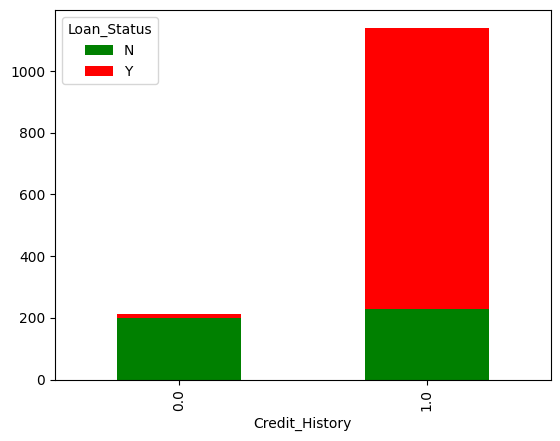

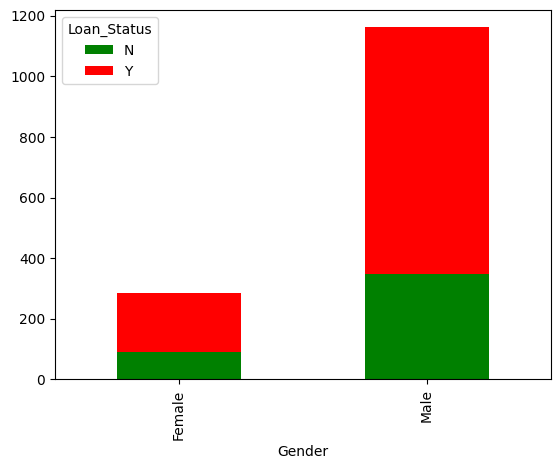

In [54]:
#combining the above 2 plots in a stacked chart
stack_chart = pd.crosstab(df['Credit_History'],df['Loan_Status'])
stack_chart. plot(kind='bar', stacked=True, color=['green' ,'red'], grid=False)
stack_chart = pd.crosstab(df[ 'Gender'], df['Loan_Status'])
stack_chart.plot(kind='bar', stacked=True, color=['green', 'red'], grid=False)

Text(0.5, 0, 'Amount')

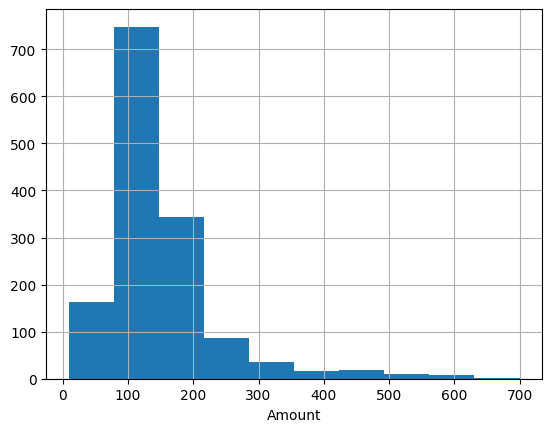

In [57]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['LoanAmount'].hist(bins=10)
plt. xlabel ('Amount')
